In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# import datasets
lego_sets, parent_themes = pd.read_csv('data/lego_sets.csv'), pd.read_csv('data/parent_theme.csv')

Understanding datasets

In [41]:
print(str(lego_sets.head()) + '\n{}'.format('*'*10))
print(str(lego_sets.shape) + '\n{}'.format('*'*10))
print(str(lego_sets.columns) + '\n{}'.format('*'*10))
print(str(lego_sets.info()) + '\n{}'.format('*'*10))
print(str(lego_sets.describe()) + '\n{}'.format('*'*10))
print(str(lego_sets.isnull().sum()) + '\n{}'.format('*'*10))


  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme  
0     Legoland  
1         Town  
2       Castle  
3        Space  
4        Space  
**********
(11986, 6)
**********
Index(['set_num', 'name', 'year', 'num_parts', 'theme_name', 'parent_theme'], dtype='object')
**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3  

In [42]:
print(str(parent_themes.head()) + '\n{}'.format('*'*10))
print(str(parent_themes.shape) + '\n{}'.format('*'*10))
print(str(parent_themes.columns) + '\n{}'.format('*'*10))
print(str(parent_themes.info()) + '\n{}'.format('*'*10))
print(str(parent_themes.describe()) + '\n{}'.format('*'*10))
print(str(parent_themes.isnull().sum()) + '\n{}'.format('*'*10))

    id     name  is_licensed
0    1  Technic        False
1   22  Creator        False
2   50     Town        False
3  112   Racers        False
4  126    Space        False
**********
(111, 3)
**********
Index(['id', 'name', 'is_licensed'], dtype='object')
**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB
None
**********
               id
count  111.000000
mean   405.270270
std    145.444394
min      1.000000
25%    298.500000
50%    411.000000
75%    505.500000
max    610.000000
**********
id             0
name           0
is_licensed    0
dtype: int64
**********


In [43]:
print(lego_sets[(lego_sets['set_num'].isnull())])

      set_num name  year  num_parts theme_name     parent_theme
11833     NaN  NaN  2017      347.0        NaN  Disney Princess
11834     NaN  NaN  2016       70.0        NaN  Disney Princess
11835     NaN  NaN  2016        NaN        NaN  Disney Princess
11836     NaN  NaN  2017      304.0        NaN     Super Heroes
11837     NaN  NaN  2017      196.0        NaN     Super Heroes
...       ...  ...   ...        ...        ...              ...
11981     NaN  NaN  2014        NaN        NaN        Minecraft
11982     NaN  NaN  2006        NaN        NaN     Super Heroes
11983     NaN  NaN  2017        NaN        NaN        Minecraft
11984     NaN  NaN  2017        8.0        NaN     Super Heroes
11985     NaN  NaN  2003        NaN        NaN     Harry Potter

[153 rows x 6 columns]


In [44]:
print(lego_sets[(lego_sets['name'].isnull())])

      set_num name  year  num_parts theme_name     parent_theme
11833     NaN  NaN  2017      347.0        NaN  Disney Princess
11834     NaN  NaN  2016       70.0        NaN  Disney Princess
11835     NaN  NaN  2016        NaN        NaN  Disney Princess
11836     NaN  NaN  2017      304.0        NaN     Super Heroes
11837     NaN  NaN  2017      196.0        NaN     Super Heroes
...       ...  ...   ...        ...        ...              ...
11981     NaN  NaN  2014        NaN        NaN        Minecraft
11982     NaN  NaN  2006        NaN        NaN     Super Heroes
11983     NaN  NaN  2017        NaN        NaN        Minecraft
11984     NaN  NaN  2017        8.0        NaN     Super Heroes
11985     NaN  NaN  2003        NaN        NaN     Harry Potter

[153 rows x 6 columns]


In [45]:
# lets see their intersection
print(lego_sets[(lego_sets['set_num'].isnull()) & (lego_sets['name'].isnull())])

      set_num name  year  num_parts theme_name     parent_theme
11833     NaN  NaN  2017      347.0        NaN  Disney Princess
11834     NaN  NaN  2016       70.0        NaN  Disney Princess
11835     NaN  NaN  2016        NaN        NaN  Disney Princess
11836     NaN  NaN  2017      304.0        NaN     Super Heroes
11837     NaN  NaN  2017      196.0        NaN     Super Heroes
...       ...  ...   ...        ...        ...              ...
11981     NaN  NaN  2014        NaN        NaN        Minecraft
11982     NaN  NaN  2006        NaN        NaN     Super Heroes
11983     NaN  NaN  2017        NaN        NaN        Minecraft
11984     NaN  NaN  2017        8.0        NaN     Super Heroes
11985     NaN  NaN  2003        NaN        NaN     Harry Potter

[153 rows x 6 columns]


In [46]:
# it is true that for all null values of set_num name is also null, ignoring these rows
lego_sets = lego_sets[~lego_sets['set_num'].isnull()]
lego_sets.isnull().sum()


set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
dtype: int64

In [47]:
# merge 
lego_sets = lego_sets.merge(parent_themes, left_on='parent_theme', right_on='name', how='left')
lego_sets.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False


In [48]:
# renaming columns
lego_sets = lego_sets.drop('name_y', axis=1)
lego_sets = lego_sets.rename(columns={'name_x':'set_name'})
lego_sets.columns

Index(['set_num', 'set_name', 'year', 'num_parts', 'theme_name',
       'parent_theme', 'id', 'is_licensed'],
      dtype='object')

In [49]:
lego_sets.head()

,set_num,set_name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [54]:
# renaming is_licensed values
lego_sets['is_licensed'] = lego_sets['is_licensed'].replace([True, False], ['1','0'])
lego_sets.head()

,set_num,set_name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,0
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,0
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,0
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,0


([<matplotlib.patches.Wedge at 0x1fa85a408b0>,
 [Text(-1.141690407956075, 0.369517269394938, 'Not Licensed'),
  Text(1.1416903993068988, -0.36951729611813044, 'Licensed')],
 [Text(-0.6659860713077104, 0.2155517404803805, '90.0%'),
  Text(0.6659860662623576, -0.2155517560689094, '10.0%')])

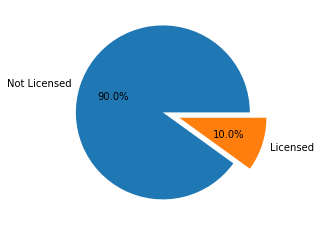

In [65]:
license_labels = {'1':'Licensed', '0':'Not Licensed'}
explode = (0.1,0.1)
licensed_pie_data=lego_sets['is_licensed'].map(license_labels).value_counts()
plt.pie(licensed_pie_data, labels=licensed_pie_data.index, autopct='%1.1f%%', explode=explode)

In [66]:
licensed_sets = lego_sets[lego_sets['is_licensed'] == '1']
licensed_sets_sw = licensed_sets[licensed_sets['parent_theme'] == 'Star Wars']


,set_num,set_name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,1
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,1
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,1
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,1
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,1
...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,1
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,1
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,1
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,1


51.653944020356235


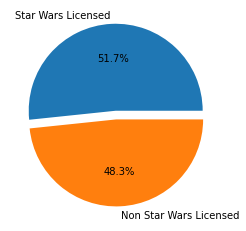

In [80]:
# solution to question 1
license_labels_sw = {'1':'Star Wars Licensed', '0':'Non Star Wars Licensed'}
explode = (0.05,0.05)
licensed_sets_sw_data=licensed_sets['parent_theme'].apply(lambda x: x=='Star Wars' and '1' or '0').map(license_labels_sw).value_counts()
plt.pie(licensed_sets_sw_data, labels=licensed_sets_sw_data.index, autopct='%1.1f%%', explode=explode)
print(licensed_sets_sw_data['Star Wars Licensed']/licensed_sets['is_licensed'].shape[0]*100)

In [101]:
# solution to question 2
# year wise set_name grouping
count_licensed_sets_by_year = licensed_sets.groupby(['year', 'parent_theme'])['set_num'].count().reset_index(['year', 'parent_theme']).sort_values(by=['year', 'set_num'])
max_sets_by_year = count_licensed_sets_by_year.groupby('year')['set_num'].max().reset_index('year')
max_sets_by_year = max_sets_by_year.merge(count_licensed_sets_by_year, on=['year', 'set_num'], how='left')
max_sets_by_year[max_sets_by_year['parent_theme']!='Star Wars']

,year,set_num,parent_theme
18,2017,72,Super Heroes


,year,set_num
35,1987,102


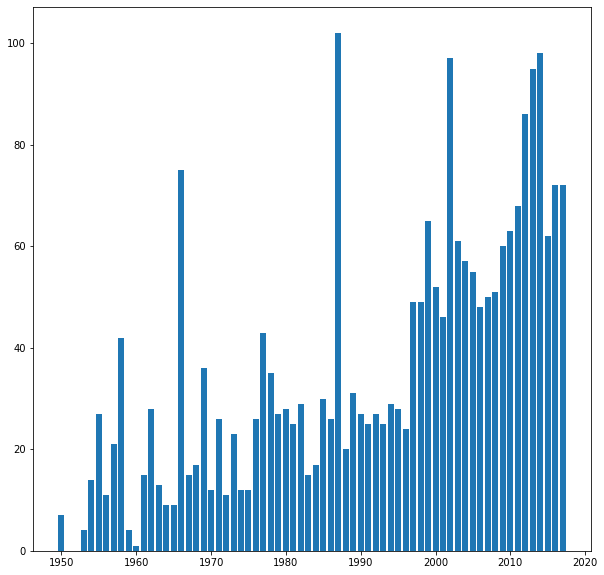

In [124]:
# bonus question 1 : which year had most unique sets released ?
count_sets_by_year = lego_sets.groupby(['year', 'parent_theme'])['set_num'].count().reset_index(['year', 'parent_theme']).sort_values(by=['year', 'set_num'])
count_max_sets_by_year = count_sets_by_year.groupby('year')['set_num'].max().reset_index()
plt.figure(figsize=(10,10))
plt.bar(count_max_sets_by_year['year'], count_max_sets_by_year['set_num'])
years_with_max_unique_sets = count_max_sets_by_year[count_max_sets_by_year['set_num'] == count_max_sets_by_year['set_num'].max()]
years_with_max_unique_sets

,year,set_num
62,2014,715


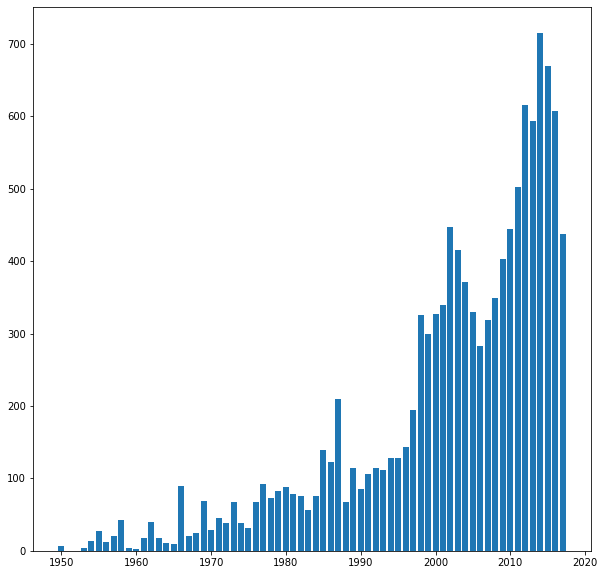

In [125]:
# bonus question 2 : which year had most sets released ?
count_sets_by_year = lego_sets.groupby(['year', 'parent_theme'])['set_num'].count().reset_index(['year', 'parent_theme']).sort_values(by=['year', 'set_num'])
count_total_sets_by_year = count_sets_by_year.groupby('year')['set_num'].sum().reset_index()
plt.figure(figsize=(10,10))
plt.bar(count_total_sets_by_year['year'], count_total_sets_by_year['set_num'])
count_max_total_sets_by_year = count_total_sets_by_year[count_total_sets_by_year['set_num'] == count_total_sets_by_year['set_num'].max()]
count_max_total_sets_by_year